In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import umap
import plotly.express as px

from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from straight_walking_speed import plot_straight_walking_speed
from os.path import join as oj

In [31]:
animal = 'RRM028'
session = 'Day130'
root_folder = '/Users/yang/Documents/Wilbrecht_Lab/sleap_video/cleaned_preprocessed_data'

'''
# following code block is used to extract assigned animal and session
animal_folder = oj(root_folder, animal)

dataframes = []

# Check if the animal folder exists
if os.path.isdir(animal_folder):
    session_folder = oj(animal_folder, session)
    if os.path.isdir(session_folder):
        for filename in os.listdir(session_folder):
            if filename.startswith(f'{animal}_{session}') and filename.endswith('_processed.csv'):
                file_path = oj(session_folder, filename)
                df = pd.read_csv(file_path, index_col=0)
                dataframes.append(df)
    else:
        print('No matching session folder found.')
else:
    print('No matching animal folder found.')

if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
else:
    print("No matching files found.")
    '''


'\n# following code block is used to extract assigned animal and session\nanimal_folder = oj(root_folder, animal)\n\ndataframes = []\n\n# Check if the animal folder exists\nif os.path.isdir(animal_folder):\n    session_folder = oj(animal_folder, session)\n    if os.path.isdir(session_folder):\n        for filename in os.listdir(session_folder):\n            if filename.startswith(f\'{animal}_{session}\') and filename.endswith(\'_processed.csv\'):\n                file_path = oj(session_folder, filename)\n                df = pd.read_csv(file_path, index_col=0)\n                dataframes.append(df)\n    else:\n        print(\'No matching session folder found.\')\nelse:\n    print(\'No matching animal folder found.\')\n\nif dataframes:\n    combined_df = pd.concat(dataframes, ignore_index=True)\nelse:\n    print("No matching files found.")\n    '

In [32]:
combined_df = pd.read_csv(oj(root_folder, 'combined_df.csv'), index_col=0)

In [33]:
print(combined_df.shape)
combined_df.head()


(837305, 38)


,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,...,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration,animal,session
index,,,,,,,,,,,,,,,,,,,,,
0,97.949959,125.948250,90.718018,125.915596,78.312035,126.051994,68.342316,123.691650,297.271604,125.932236,...,0.000000,0.000000,0.000000,0.000000,5366.158657,6103.448865,6087.064396,4976.537731,RRM028,Day136
1,103.294258,126.465607,98.100525,126.174385,85.752670,125.916733,74.097397,125.736877,297.810956,119.994282,...,178.871955,203.448296,202.902147,165.884591,444.021472,-256.515885,-354.946138,101.096186,RRM028,Day136
2,111.046303,126.946213,105.955849,126.559837,93.239532,126.049316,80.696983,125.685104,298.240149,113.552809,...,193.672671,194.897766,191.070609,169.254464,254.476626,-326.058207,-326.396008,351.326716,RRM028,Day136
3,118.300751,127.073494,111.140808,126.629097,98.491478,126.034889,86.217712,123.775703,298.339819,106.815038,...,202.155225,184.029159,180.190742,180.965354,-47.854098,502.099255,716.147302,995.369931,RRM028,Day136
4,126.184807,126.752533,119.117012,126.511871,106.560745,126.113716,94.671455,125.946205,298.074981,100.134950,...,200.560089,200.765801,204.062318,214.144352,-242.376663,267.522220,322.237925,183.658880,RRM028,Day136


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

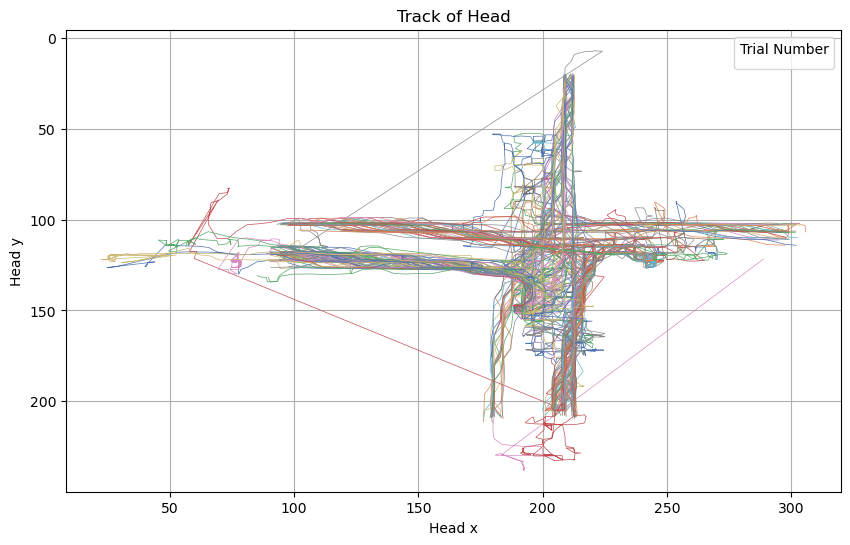

In [34]:
# Define the start and stop frames
start_frame, stop_frame = 0, 19000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='Head x',
        y='Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

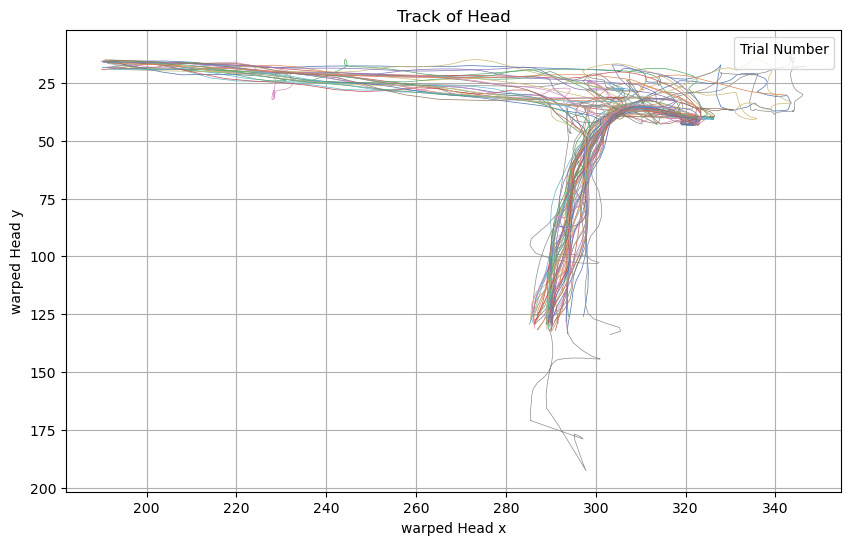

In [35]:
# Define the start and stop frames
start_frame, stop_frame = 0, 5000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='warped Head x',
        y='warped Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


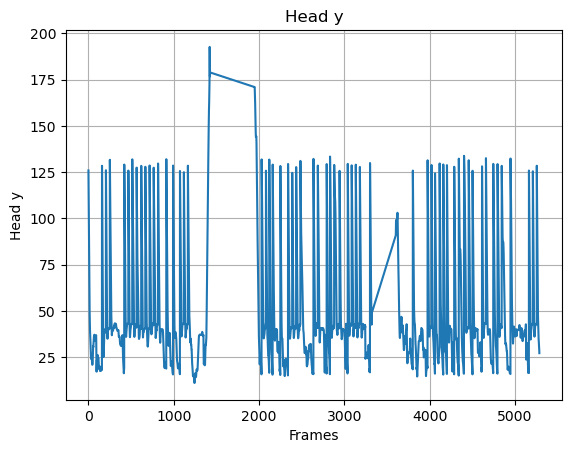

In [36]:

plot_df = combined_df[0:5000]
sns.lineplot(data=plot_df, x=plot_df.index, y='warped Head y')
plt.title('Head y')
plt.xlabel('Frames')
plt.ylabel('Head y')
#plt.xlim(0, )
plt.grid(True)
plt.show()


In [37]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

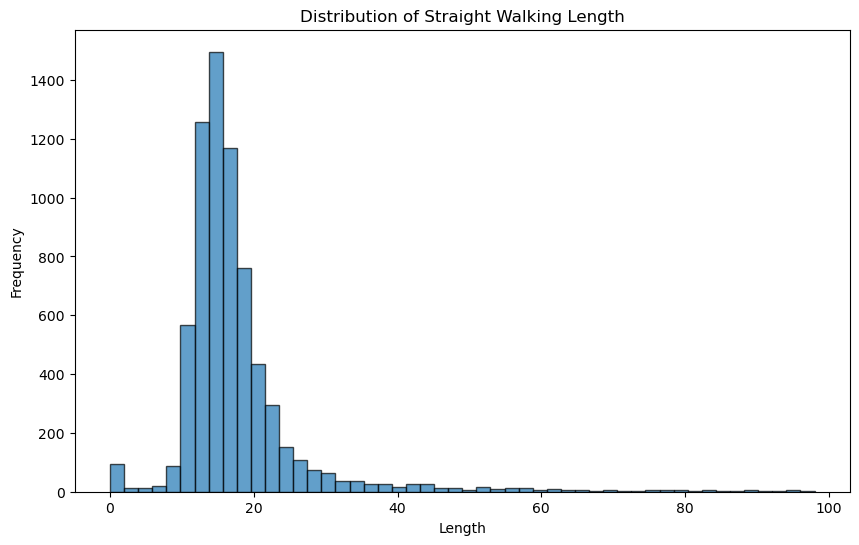

In [38]:
# distribution of straight walking length (movement before T_Entry)
current_trial_num = np.nan
current_decision = np.nan
decision = np.nan
length = 0

straight_walking_length = []
trials = []
current_trial_speeds = []
current_trial_coords = []

for index, row in combined_df.iterrows():
    trial_num = row['trial']
    decision = row['decision']
    speed = row['Head velocity']
    head_x = row['warped Head x']
    head_y = row['warped Head y']
    
    if not pd.isna(decision):
        current_decision = decision    
        
    if trial_num != current_trial_num: # End of current trial and start of a new trial
        if length < 100:
            straight_walking_length.append(length)
            current_decision = np.nan
            current_trial_num = trial_num
        length = 0
        
    if pd.isna(current_decision) and index != 0:
        if speed < 300:
            length += 1

straight_walking_length_df = pd.DataFrame(straight_walking_length)
plt.figure(figsize=(10, 6))
plt.hist(straight_walking_length_df, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Straight Walking Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [39]:
def get_trial_profile(df, speed_threshold=500, speed_length=12, coord_length=13):
    """
    Extracts the straight walking speed curve, trajectory, average speed, and final decision for each trial.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the labeled data with decisions.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    length_threshold (int): The target length for normalization of speed profiles. Profiles shorter than this are excluded.
    coord_length (int): The number of coordinate points to extract before each decision.
    
    Returns:
    pandas.DataFrame: A DataFrame with each row representing a trial, containing columns
                      for the trial number, speed profile, coordinate data, and the final decision.
    """
    current_trial_num = np.nan
    current_decision = np.nan
    decision = np.nan
    
    trials = []
    current_trial_speeds = []
    current_trial_coords = []

    for index, row in df.iterrows():
        trial_num = row['trial']
        decision = row['decision']
        speed = row['Head velocity']
        head_x = row['warped Head x']
        head_y = row['warped Head y']
        
        if not pd.isna(decision):
            current_decision = decision    
            
        if trial_num != current_trial_num: # End of current trial and start of a new trial
            
            if len(current_trial_speeds) >= speed_length and len(current_trial_coords) >= coord_length * 2:
                # Use the last `speed_length` frames of speed values and `coord_length` frames of coordinates as the profile
                normalized_speeds = current_trial_speeds[-speed_length:]
                normalized_coords = current_trial_coords[-(coord_length * 2):]
                x1, y1 = normalized_coords[0], normalized_coords[1]
                x2, y2 = normalized_coords[-2], normalized_coords[-1]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                average_speed = distance / ((coord_length - 1) / 30)
                trials.append([normalized_speeds, normalized_coords, current_decision, average_speed])
                
            current_trial_speeds = []
            current_trial_coords = []
            current_decision = np.nan
            current_trial_num = trial_num

        if pd.isna(current_decision) and index != 0:
            if speed < speed_threshold:
                current_trial_speeds.append(speed)
                current_trial_coords.append(head_x)
                current_trial_coords.append(head_y)
        
    # Handle the final trial
    if not pd.isna(current_decision) and len(current_trial_speeds) >= speed_length and len(current_trial_coords) >= coord_length * 2:
        normalized_speeds = current_trial_speeds[-speed_length:]
        normalized_coords = current_trial_coords[-(coord_length * 2):]
        x1, y1 = normalized_coords[0], normalized_coords[1]
        x2, y2 = normalized_coords[-2], normalized_coords[-1]
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        average_speed = distance / ((coord_length - 1) / 30)
        trials.append([normalized_speeds, normalized_coords, current_decision, average_speed])
    
    # Convert the list of trials to a DataFrame with appropriate column names
    speed_profiles = [t[0] for t in trials]
    coord_profiles = [t[1] for t in trials]
    decisions = [t[2] for t in trials]
    average_speeds = [t[3] for t in trials]

    # Flatten coordinate profiles into individual columns
    coord_columns = [f'x{i//2+1}' if i % 2 == 0 else f'y{i//2+1}' for i in range(coord_length * 2)]
    
    profiles_df = pd.DataFrame(speed_profiles, columns=[f'speed {i+1}' for i in range(speed_length)])
    coords_df = pd.DataFrame(coord_profiles, columns=coord_columns)
    
    profiles_df['final decision'] = decisions
    profiles_df['average speed'] = average_speeds
    final_df = pd.concat([profiles_df, coords_df], axis=1)

    return final_df

In [40]:
straight_walking_speed_profiles = get_trial_profile(combined_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])


In [41]:
straight_walking_speed_profiles.head()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13
0,200.560089,192.480866,192.054202,185.782466,170.463378,161.285442,145.545740,134.549352,133.186663,116.349700,...,299.091369,60.847964,300.857253,56.774721,301.656490,52.979644,301.677435,49.426598,301.526447,46.201862
1,147.387071,157.952919,168.531497,197.201464,221.746063,231.604137,232.705087,229.357413,215.587327,188.836309,...,294.105100,68.478032,294.425156,61.298919,294.952068,55.026468,295.862852,50.160005,297.269832,46.231760
2,177.952939,180.212622,161.985356,154.945946,163.386109,164.162926,165.154064,160.758897,156.754919,151.399339,...,296.681493,64.720174,298.126209,59.698707,299.605052,54.873601,300.964998,50.889872,301.826890,47.863286
3,135.784715,165.963204,187.277413,201.541330,202.926744,182.912246,178.919307,180.279776,169.866664,168.638335,...,295.388447,71.432434,294.779795,65.803020,295.349918,60.210729,297.220262,54.543986,297.971756,49.239789
4,191.455549,190.987055,186.862597,188.778598,189.301041,189.998172,193.748189,191.014701,177.876715,167.111548,...,293.397419,69.613376,293.741402,63.694138,294.712653,58.209080,296.323481,53.138752,297.963140,48.334868


In [42]:
# plot the coorelation between decision and speed
def plot_decision_composition(df, column, window_size=50, step_size=10):
    """
    Plots the composition of different decisions in different average speed intervals using a line graph with MSE.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing 'average_speed' and 'final_decision' columns.
    window_size (int): The size of the speed window.
    step_size (int): The step size for the sliding window.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Define speed intervals using a sliding window
    max_speed = df_copy[column].max()
    min_speed = df_copy[column].min()
    speed_intervals = np.arange(min_speed, max_speed + step_size, step_size)

    proportions = []
    
    for i in range(len(speed_intervals) - 1):
        lower_bound = speed_intervals[i]
        upper_bound = lower_bound + window_size
        interval_data = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] < upper_bound)]
        
        if len(interval_data) > 0:
            interval_composition = interval_data['final decision'].value_counts(normalize=True)
            proportions.append(interval_composition)
            
        else:
            proportions.append(pd.Series())
    # Create a DataFrame for the proportions
    proportions_df = pd.DataFrame(proportions, index=speed_intervals[:-1])

    # Plot the line graph with MSE error bars
    plt.figure(figsize=(10, 6))
    for decision in proportions_df.columns:
        plt.errorbar(proportions_df.index, proportions_df[decision], label=decision)
    
    plt.xlabel(column)
    plt.ylabel('Proportion of Decisions')
    plt.title('Composition of Decisions in Different Average Speed Intervals')
    plt.legend(title='Decision')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [85]:
def plot_decision_composition(df, column, window_size=50, step_size=10, x_range=None):
    """
    Plots the composition of different decisions in different average speed intervals using a line graph with SEM.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing 'average_speed' and 'final_decision' columns.
    window_size (int): The size of the speed window.
    step_size (int): The step size for the sliding window.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Define speed intervals using a sliding window
    max_speed = df_copy[column].max()
    min_speed = df_copy[column].min()
    speed_intervals = np.arange(min_speed, max_speed + step_size, step_size)

    proportions = []
    for i in range(len(speed_intervals) - 1):
        lower_bound = speed_intervals[i]
        upper_bound = lower_bound + window_size
        interval_data = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] < upper_bound)]
        
        if len(interval_data) > 0:
            interval_composition = interval_data['final decision'].value_counts(normalize=True)
            proportions.append(interval_composition)
        else:
            proportions.append(pd.Series(dtype=float))
    
    # Create a DataFrame for the proportions
    proportions_df = pd.DataFrame(proportions, index=speed_intervals[:-1])

    # Calculate the mean and SEM for the proportions
    means = proportions_df.mean(axis=1)
    sems = proportions_df.sem(axis=1)
    
    # Plot the line graph with SEM error bars
    plt.figure(figsize=(10, 6))
    for decision in proportions_df.columns:
        mean_vals = proportions_df[decision]
        sem_vals = proportions_df[decision].sem()
        plt.plot(proportions_df.index, mean_vals, label=decision)
        plt.fill_between(proportions_df.index, mean_vals - sem_vals, mean_vals + sem_vals, alpha=0.2)
    
    plt.xlabel(column)
    plt.ylabel('Proportion of Decisions')
    plt.title('Composition of Decisions in Different Average Speed Intervals')
    plt.legend(title='Decision')
    plt.grid(True)
    if x_range is not None:
        plt.xlim(x_range)
    plt.tight_layout()
    plt.show()

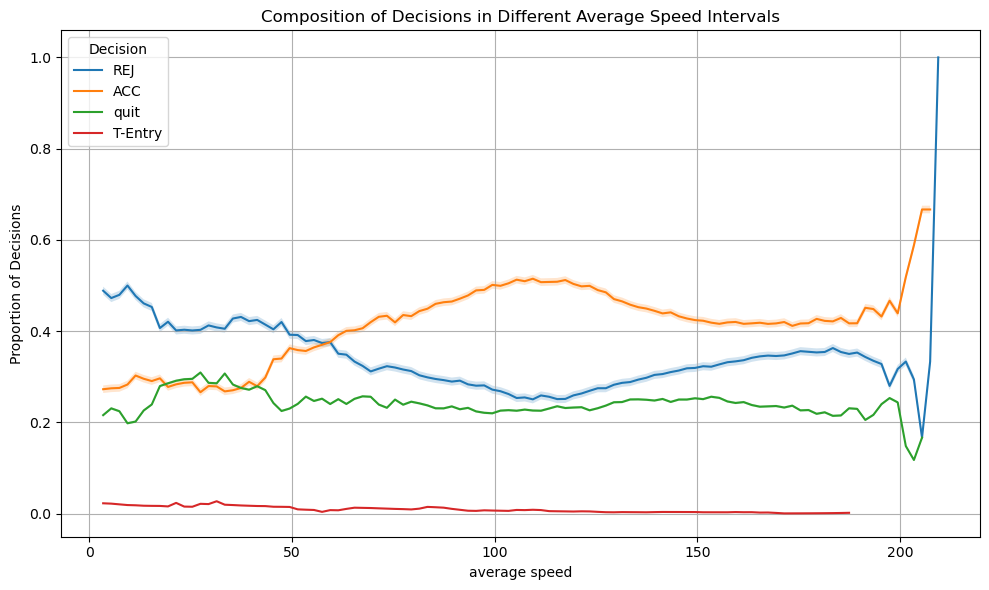

In [44]:
plot_decision_composition(straight_walking_speed_profiles, column='average speed', window_size=30, step_size=2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



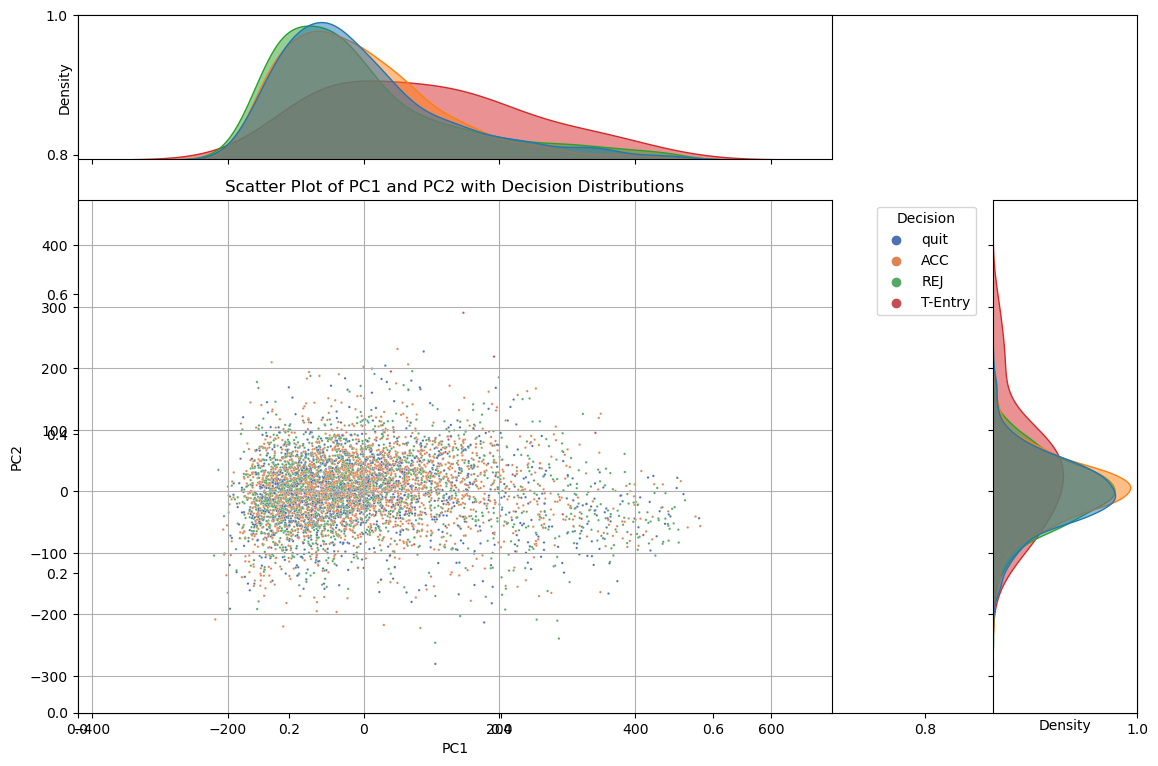

In [73]:
pca_columns=[f'speed {i+1}' for i in range(12)]

"""
Performs PCA on the coordinate columns of the DataFrame and adds the principal components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in PCA.
n_components (int): Number of principal components to extract.

Returns:
pandas.DataFrame: The DataFrame with the principal components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(coords_data)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(2)]
pc_df = pd.DataFrame(principal_components, columns=pc_columns)

# Add the principal components to the original DataFrame
speed_pca = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), pc_df.reset_index(drop=True)], axis=1)

"""
Plots the PCA results, including a scatter plot of PC1 and PC2 and the variance explained by each PC.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with the principal components.
pca (PCA): The fitted PCA object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# Scatter plot of PC1 and PC2
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('PC1')
main_ax.set_ylabel('PC2')
main_ax.set_title('Scatter Plot of PC1 and PC2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# New Code: KDE plot for the distribution of different decisions' points along PC1
sns.kdeplot(data=speed_pca, x='PC1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# New Code: KDE plot for the distribution of different decisions' points along PC2
sns.kdeplot(data=speed_pca, y='PC2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [67]:
pca_columns = [f'speed {i+1}' for i in range(12)]

"""
Performs UMAP on the coordinate columns of the DataFrame and adds the UMAP components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in UMAP.
n_components (int): Number of UMAP components to extract.

Returns:
pandas.DataFrame: The DataFrame with the UMAP components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(coords_data)

# Create a DataFrame for the UMAP components
umap_columns = [f'UMAP{i+1}' for i in range(2)]
umap_df = pd.DataFrame(umap_components, columns=umap_columns)

# Add the UMAP components to the original DataFrame
speed_umap = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), umap_df.reset_index(drop=True)], axis=1)

"""
Plots the UMAP results, including a scatter plot of UMAP1 and UMAP2.

Parameters:
df_with_umap (pandas.DataFrame): The DataFrame with the UMAP components.
umap (UMAP): The fitted UMAP object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Use Plotly Express for the main scatter plot
fig = px.scatter(speed_umap, x='UMAP1', y='UMAP2', color='final decision',
                 title='Scatter Plot of UMAP1 and UMAP2 with Decision Distributions',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['final decision'])
fig.update_traces(marker=dict(size=4))
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



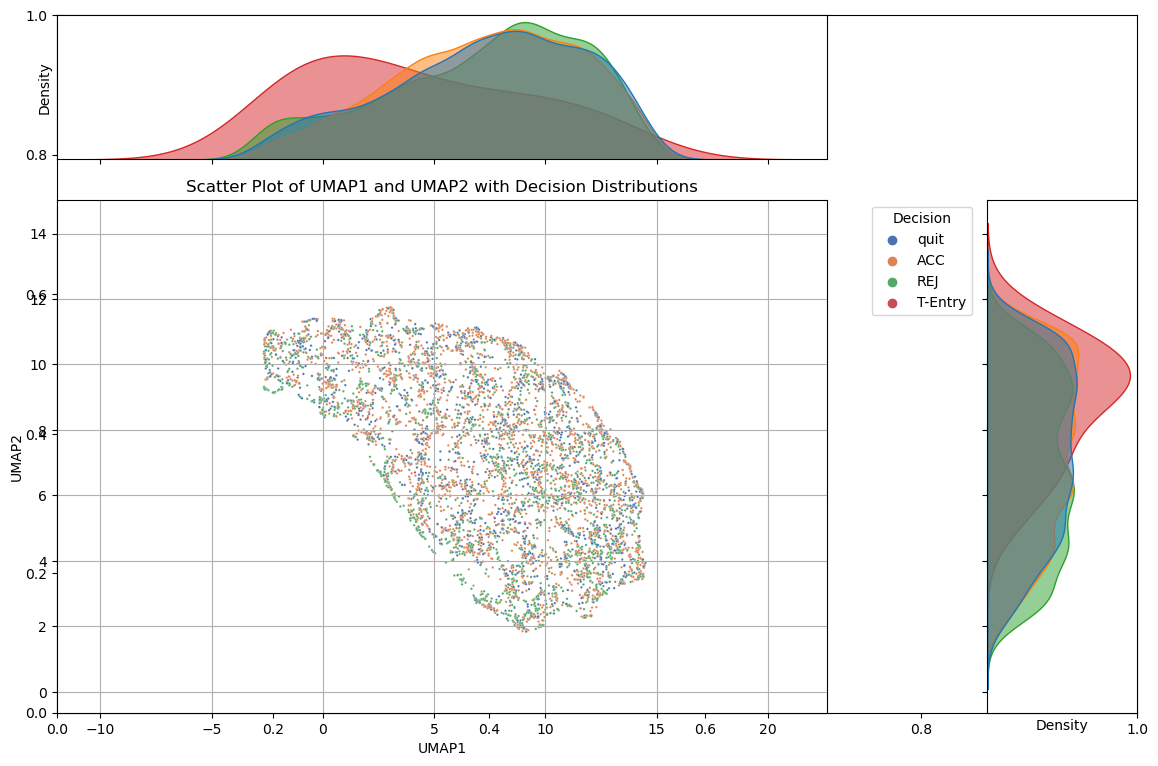

In [74]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# KDE plot of UMAP1 and UMAP2
sns.scatterplot(data=speed_umap, x='UMAP1', y='UMAP2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('UMAP1')
main_ax.set_ylabel('UMAP2')
main_ax.set_title('Scatter Plot of UMAP1 and UMAP2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# KDE plot for the distribution of different decisions' points along UMAP1
sns.kdeplot(data=speed_umap, x='UMAP1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# KDE plot for the distribution of different decisions' points along UMAP2
sns.kdeplot(data=speed_umap, y='UMAP2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [75]:
# Define the trajectory columns
pca_columns = [f'x{i}' for i in range(1, 14)] + [f'y{i}' for i in range(1, 14)]

# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(coords_data)

# Create a DataFrame for the UMAP components
umap_columns = [f'UMAP{i+1}' for i in range(2)]
umap_df = pd.DataFrame(umap_components, columns=umap_columns)

# Add the UMAP components to the original DataFrame
coords_umap = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), umap_df.reset_index(drop=True)], axis=1)

# Apply K-means clustering to UMAP components
kmeans = KMeans(n_clusters=5, random_state=42).fit(umap_df)

# Add cluster labels to the DataFrame
coords_umap['Cluster'] = kmeans.labels_

# Scatter plot of UMAP1 and UMAP2 with decisions using Plotly
fig = px.scatter(coords_umap, x='UMAP1', y='UMAP2', color='final decision',
                 title='Scatter Plot of UMAP1 and UMAP2 with Decision Distributions',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['final decision'])
fig.update_traces(marker=dict(size=3))
fig.show()

# Scatter plot of UMAP1 and UMAP2 with clusters using Plotly
fig = px.scatter(coords_umap, x='UMAP1', y='UMAP2', color='Cluster',
                 title='Clusters on UMAP1 and UMAP2',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['Cluster'])
fig.update_traces(marker=dict(size=3))
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



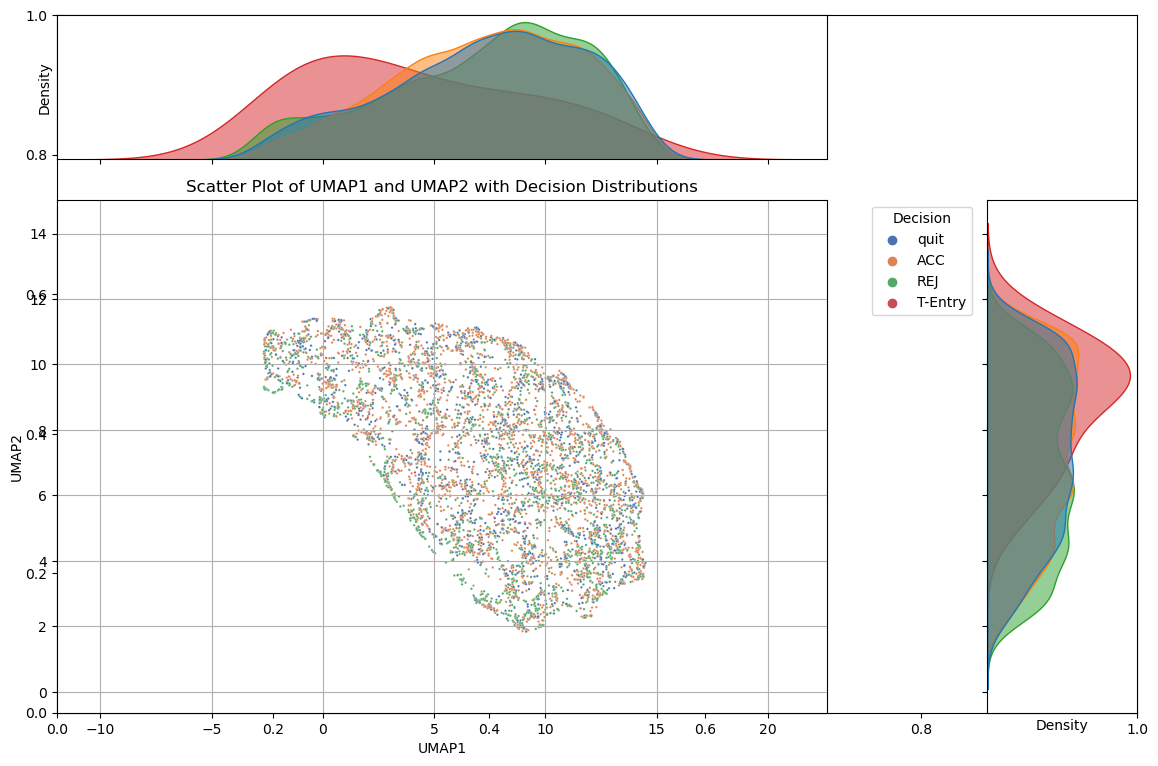

In [76]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# KDE plot of UMAP1 and UMAP2
sns.scatterplot(data=coords_umap, x='UMAP1', y='UMAP2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('UMAP1')
main_ax.set_ylabel('UMAP2')
main_ax.set_title('Scatter Plot of UMAP1 and UMAP2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# KDE plot for the distribution of different decisions' points along UMAP1
sns.kdeplot(data=coords_umap, x='UMAP1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# KDE plot for the distribution of different decisions' points along UMAP2
sns.kdeplot(data=coords_umap, y='UMAP2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

PC1 = -0.216 * x1 + -0.252 * x2 + -0.290 * x3 + -0.314 * x4 + -0.329 * x5 + -0.331 * x6 + -0.332 * x7 + -0.325 * x8 + -0.305 * x9 + -0.278 * x10 + -0.246 * x11 + -0.206 * x12


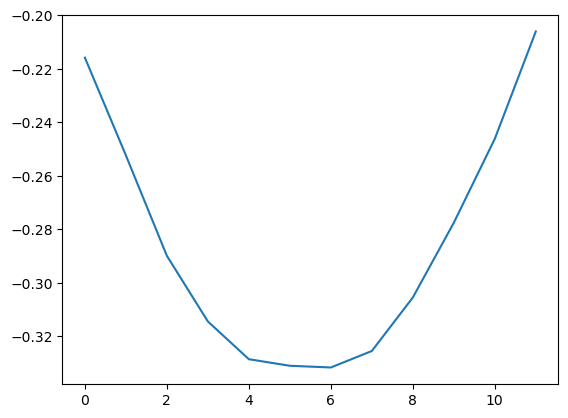

In [77]:
# Output the expression of PC1
pc1_expression = " + ".join([f"{coef:.3f} * {col}" for coef, col in zip(pca.components_[0], pca_columns)])
print(f"PC1 = {pc1_expression}")
plt.plot(pca.components_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


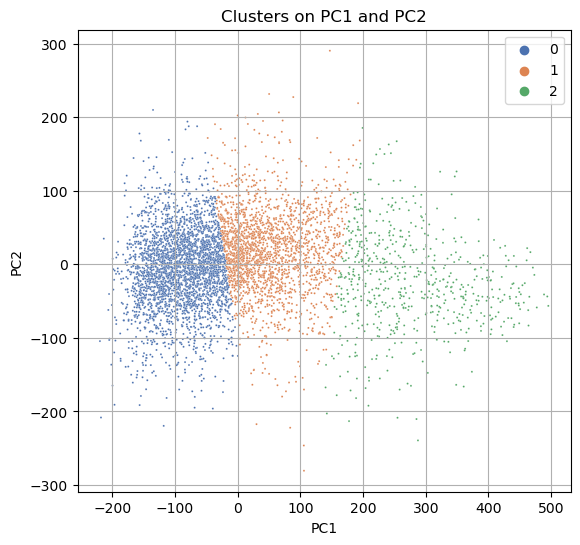

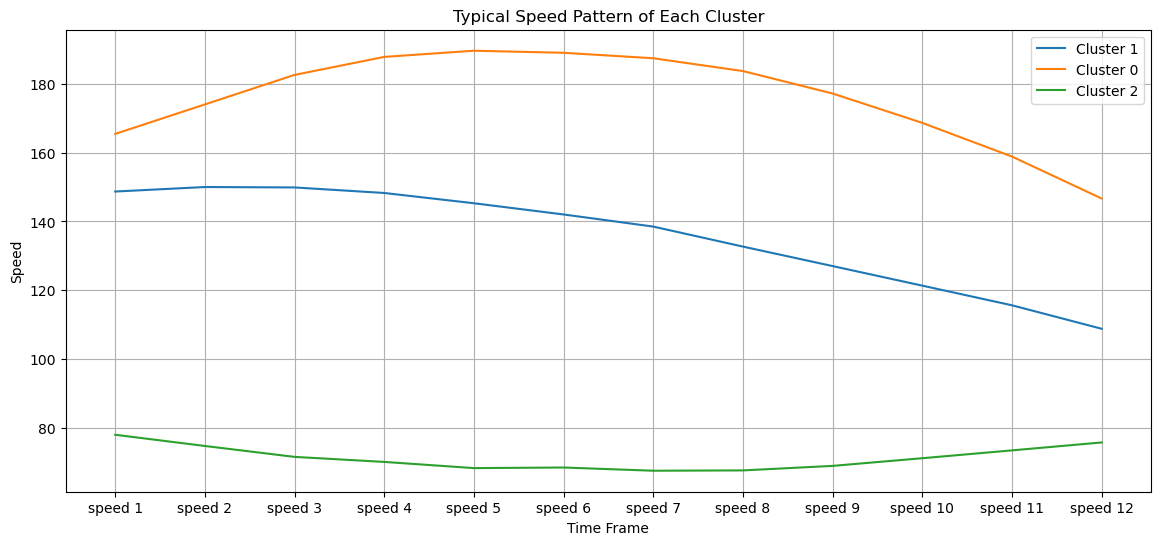

In [ ]:

"""
Clusters the PCA-transformed data using K-means and adds cluster labels to the DataFrame.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components.
n_clusters (int): The number of clusters to form.

Returns:
pandas.DataFrame: The DataFrame with cluster labels added.
"""
# Extract the PCA columns
pca_columns = ['PC1', 'PC2']
pca_data = speed_pca[pca_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_data)

# Add cluster labels to the DataFrame
speed_pca['Cluster'] = kmeans.labels_


"""
Plots the PCA results with clusters and decision labels.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components and cluster labels.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Scatter plot of PC1 and PC2 with clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
clusters = speed_pca['Cluster'].unique()
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='Cluster', palette='deep', s=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the typical speed pattern of each cluster
"""
Plots the typical speed pattern for each cluster.

Parameters:
speed_pca (pandas.DataFrame): The DataFrame with speed profiles and cluster labels.
"""
plt.figure(figsize=(14, 6))

for cluster in clusters:
    cluster_data = speed_pca[speed_pca['Cluster'] == cluster]
    mean_speed_pattern = cluster_data[[f'speed {i+1}' for i in range(12)]].mean()
    plt.plot(mean_speed_pattern, label=f'Cluster {cluster}')

plt.xlabel('Time Frame')
plt.ylabel('Speed')
plt.title('Typical Speed Pattern of Each Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
# Function to calculate the slope and intercept for each trial using sklearn
def calculate_slope_intercept(df):
    slopes = []
    intercepts = []

    for index, row in df.iterrows():
        x_coords = row[[f'x{i+1}' for i in range(13)]].values.reshape(-1, 1)
        y_coords = row[[f'y{i+1}' for i in range(13)]].values.reshape(-1, 1)
        
        # Perform linear regression using sklearn
        reg = LinearRegression().fit(y_coords, x_coords)
        slope = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    df['slope'] = slopes
    df['intercept'] = intercepts

    return df

# Apply the function to the DataFrame
straight_walking_speed_profiles = calculate_slope_intercept(straight_walking_speed_profiles)

(array([   4.,    9.,   34.,   59.,  121.,  317.,  783., 1446., 1449.,
         954.,  288.,   94.,   24.,   13.,   12.,    8.,    8.,    4.,
           4.,    2.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

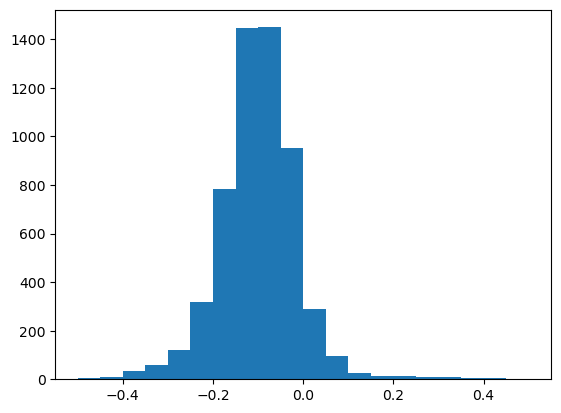

In [80]:
plt.hist(straight_walking_speed_profiles['slope'], bins=20, range=(-0.5, 0.5))

In [82]:
print(straight_walking_speed_profiles.shape)
straight_walking_speed_profiles.describe()

(5709, 42)


,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x10,y10,x11,y11,x12,y12,x13,y13,slope,intercept
count,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,...,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000
mean,149.904081,154.584643,158.769965,160.819319,160.507720,159.035476,156.818848,152.757909,147.390917,141.043440,...,293.457403,60.800023,294.096766,56.226236,294.773918,51.906883,295.420626,47.898769,-0.102523,299.850000
std,40.840607,41.782253,43.673869,44.642383,45.263301,45.187748,45.454331,45.470509,44.493390,42.531296,...,4.519174,4.853649,4.603644,3.660881,4.776562,2.616767,5.033502,1.847199,0.209204,10.589518
min,0.512061,0.741833,0.682549,0.119328,0.450017,0.534800,0.944998,1.056770,0.648874,1.627407,...,207.755596,18.647106,205.076596,14.867183,199.731836,11.666608,195.118687,10.894272,-4.086531,49.498013
25%,132.316038,137.934358,139.932138,140.359861,138.695419,136.637058,134.365198,128.856857,122.339434,116.905160,...,290.853780,57.970413,291.643797,53.954338,292.555637,50.285746,293.088567,46.738343,-0.147795,296.250345
50%,155.374324,162.177154,167.311122,169.582212,169.135345,167.761691,165.543243,159.887928,152.840754,145.302731,...,293.683373,61.291616,294.199774,56.384287,295.138168,51.815574,296.137381,47.708199,-0.099327,300.063626
75%,175.169782,180.617523,187.962973,191.508530,192.297492,190.849487,188.487277,184.293613,177.746745,171.435512,...,296.782008,63.979144,297.315806,58.548745,297.884407,53.481315,298.492945,48.871002,-0.049779,303.887891
max,445.135337,399.373547,432.341506,318.603434,310.590601,264.888440,273.432395,289.003713,394.912483,269.555547,...,319.042135,122.506997,319.333258,124.568287,320.113771,127.466491,321.410008,121.736075,8.697743,485.011413


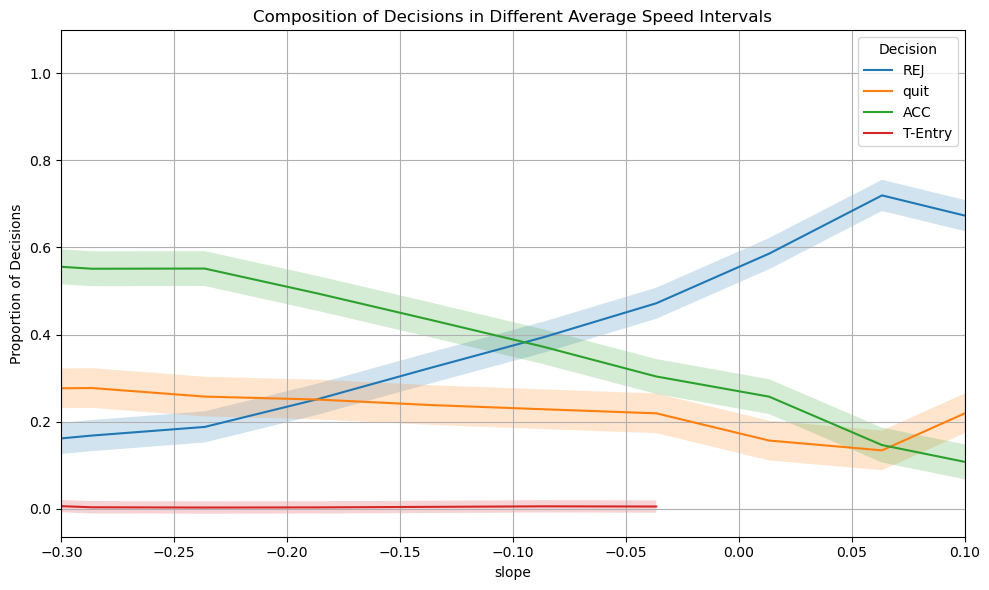

In [86]:
plot_decision_composition(straight_walking_speed_profiles, column='slope', window_size=0.1, step_size=0.05, x_range=(-0.3, 0.1))

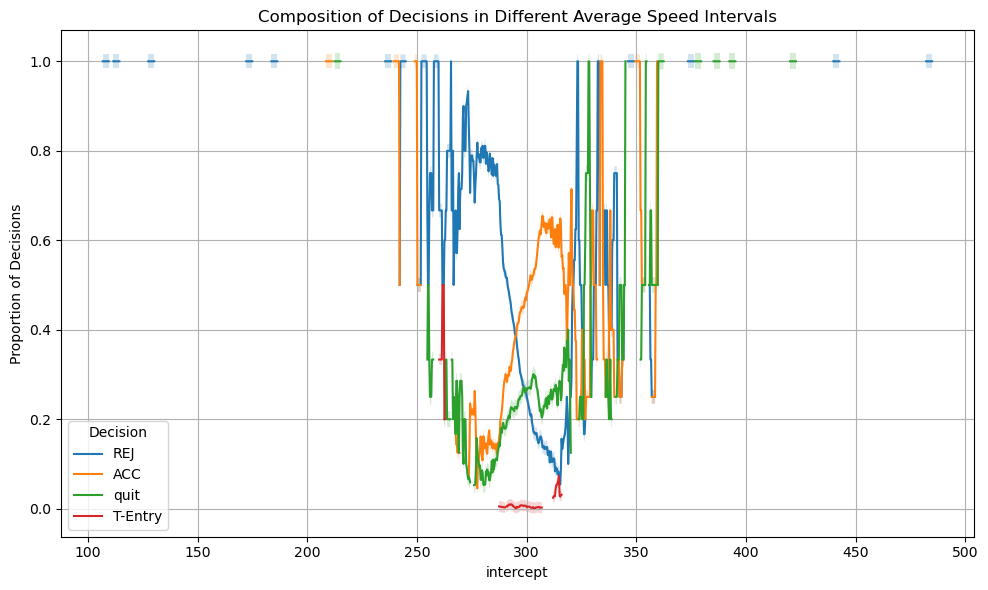

In [84]:
plot_decision_composition(straight_walking_speed_profiles, column='intercept', window_size=3, step_size=0.3)